# Adult Salary Prediction

## Importing Libraries

In [87]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Data

In [88]:
df = pd.read_csv('adult_data.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [89]:
df.shape

(32561, 15)

In [90]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [92]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- The average capital-gain is 1077.64 but theres a huge range in the capital-gain column. The maximum value is 99999.00 and the minimum value is 0.00. indicating most people have a capital-gain of 0.00 but a few have very large gains.
- The average capital-loss is 87.30 with a huge range from 0.00 to 4356.00. Most people have a capital-loss of 0.00 but a few have very large losses.
- People work an average of 40.4 hours per week. The range is from 1 to 99 hours per week.

## Data Preprocessing

In [93]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 salary            0
dtype: int64

In [94]:
df.columns = df.columns.str.replace('-', '_').str.replace(' ', '').str.lower()
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

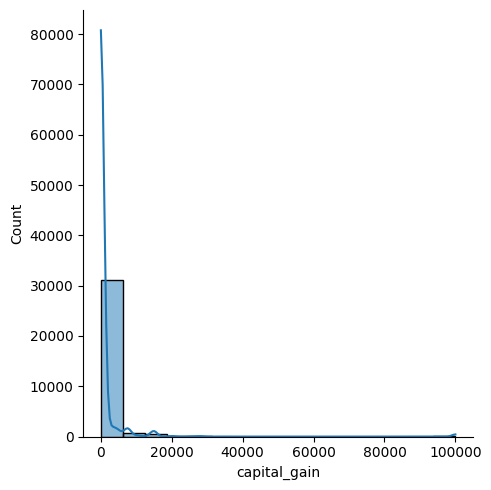

In [95]:
sns.displot(df['capital_gain'], kde=True)

In [96]:
# df.loc[df['capital_gain']==0, 'capital_gain'] = np.nan
# df.capital_gain = np.log(df.capital_gain)
# df.loc[df['capital_gain']==0, 'capital_gain'] = np.nan

In [97]:
df.capital_gain = df.capital_gain.replace(0, np.nan)

In [98]:
df.capital_gain = np.log(df.capital_gain)

In [99]:
df.fillna({'capital_gain': 0}, inplace=True)

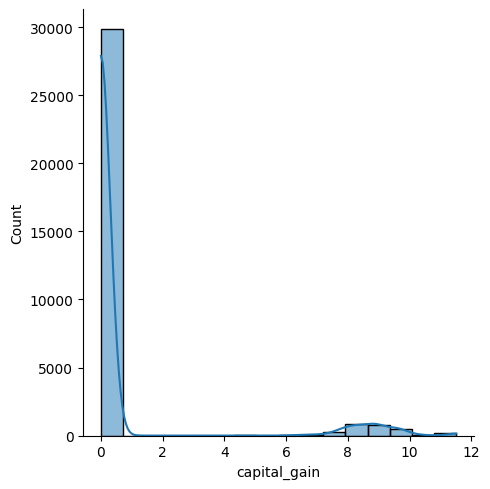

In [100]:
sns.displot(df['capital_gain'], kde=True)

In [101]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,0.734601,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,2.454680,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,11.512915,4356.000000,99.000000


In [102]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

## Removing outliers from hours_per_week column

There are obviously outliers in the hours_per_week column. The maximum value is 99 hours per week which is not possible. We will remove these outliers.

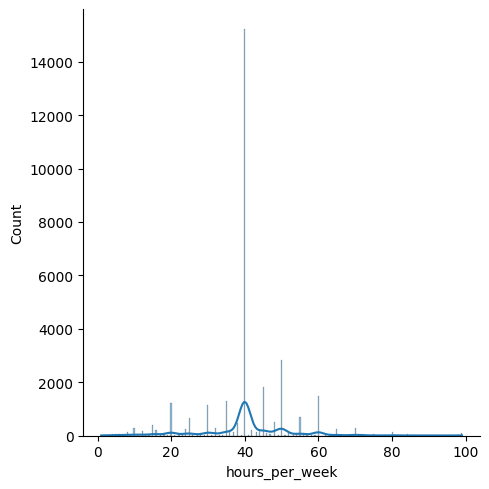

In [103]:
sns.displot(df['hours_per_week'], kde=True)

<Axes: ylabel='hours_per_week'>

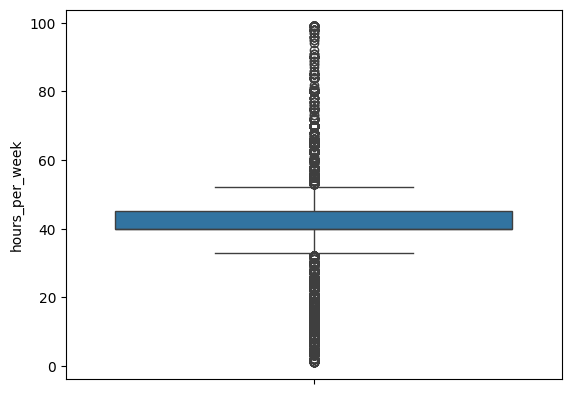

In [104]:
sns.boxplot(df['hours_per_week'])

In [105]:
IQR = df.hours_per_week.quantile(0.75) - df.hours_per_week.quantile(0.25)
lower_range = df.hours_per_week.quantile(0.25) - (IQR * 1.5)
upper_range = df.hours_per_week.quantile(0.75) + (IQR * 1.5)
lower_range, upper_range

(np.float64(32.5), np.float64(52.5))

In [106]:
df.hours_per_week = df.hours_per_week.astype('float64')
df['hours_per_week'].dtype

dtype('float64')

In [107]:
    df.loc[df['hours_per_week'] <= lower_range, 'hours_per_week'] = lower_range
    df.loc[df['hours_per_week'] >= upper_range, 'hours_per_week'] = upper_range

<Axes: ylabel='hours_per_week'>

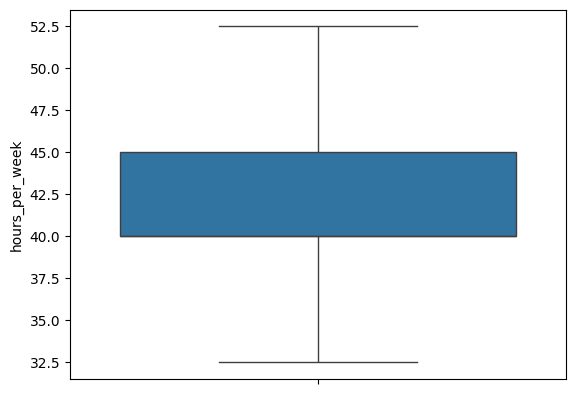

In [108]:
sns.boxplot(df['hours_per_week'])

## Removing outliers from education_num column

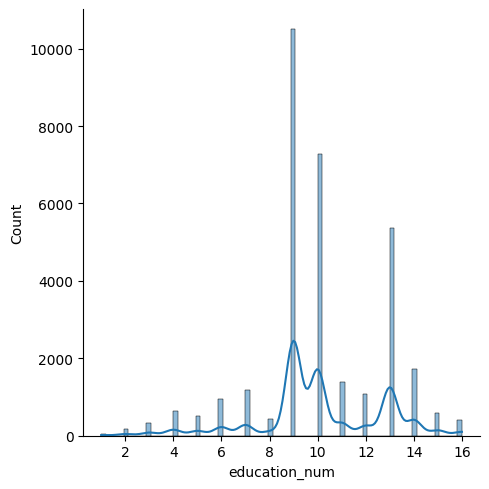

In [109]:
sns.displot(df.education_num, kde=True)

<Axes: xlabel='education_num'>

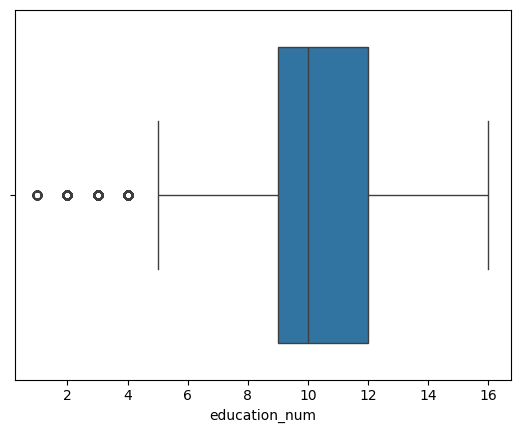

In [110]:
sns.boxplot(df['education_num'], orient='h')

In [111]:
IQR = df.education_num.quantile(0.75) - df.education_num.quantile(0.25)
lower_range = df.education_num.quantile(0.25) - (IQR * 1.5)
upper_range = df.education_num.quantile(0.75) + (IQR * 1.5)
lower_range, upper_range

(np.float64(4.5), np.float64(16.5))

In [112]:
df.education_num = df.education_num.astype('float64')
df['education_num'].dtype

dtype('float64')

In [113]:
    df.loc[df['education_num'] <= lower_range, 'education_num'] = lower_range
    df.loc[df['education_num'] >= upper_range, 'education_num'] = upper_range

<Axes: xlabel='education_num'>

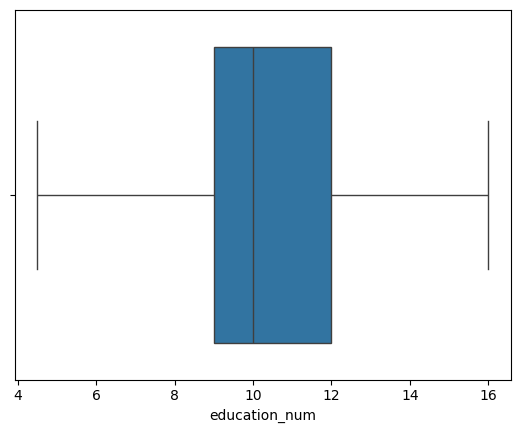

In [114]:
sns.boxplot(df['education_num'], orient='h')

## Removing outliers from capital_loss

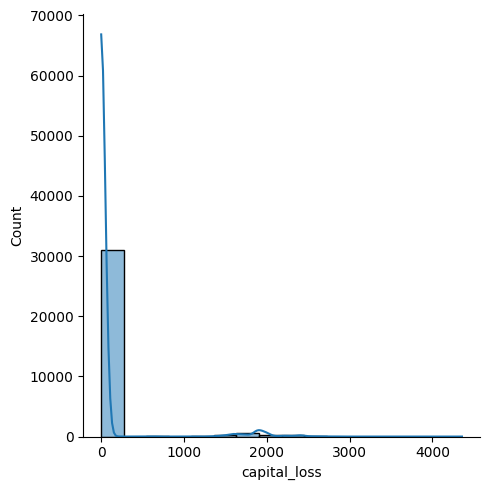

In [115]:
sns.displot(df.capital_loss, kde=True)

In [116]:
df['capital_loss'] = np.where(df['capital_loss'] == 0, np.nan, df['capital_loss'])
df['capital_loss'] = np.log(df['capital_loss'])
df['capital_loss'] = df['capital_loss'].replace(np.nan, 0)

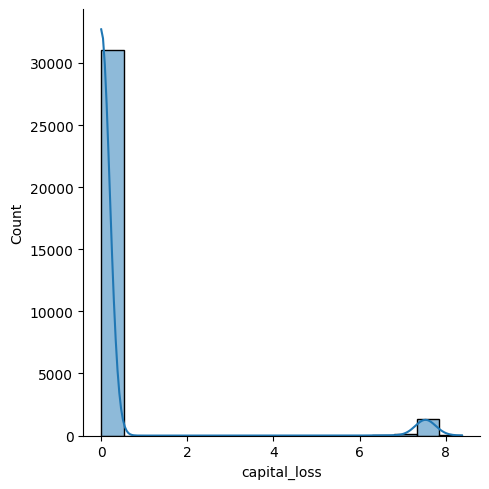

In [117]:
sns.displot(df['capital_loss'], kde='True')

<Axes: ylabel='capital_loss'>

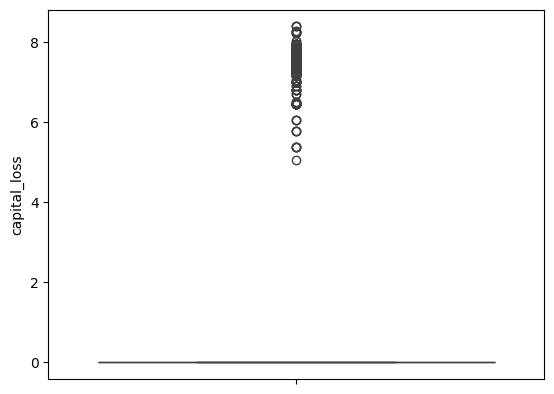

In [118]:
sns.boxplot(df['capital_loss'])

In [119]:
IQR = df['capital_loss'].quantile(0.75) - df['capital_loss'].quantile(0.25)

In [120]:
lower_range = df['capital_loss'].quantile(0.25) - (1.5 * IQR)
upper_range = df['capital_loss'].quantile(0.75) + (1.5 * IQR)

In [121]:
df.loc[df['capital_loss'] <= lower_range, 'capital_loss'] = lower_range
df.loc[df['capital_loss'] >= upper_range, 'capital_loss'] = upper_range

<Axes: ylabel='capital_loss'>

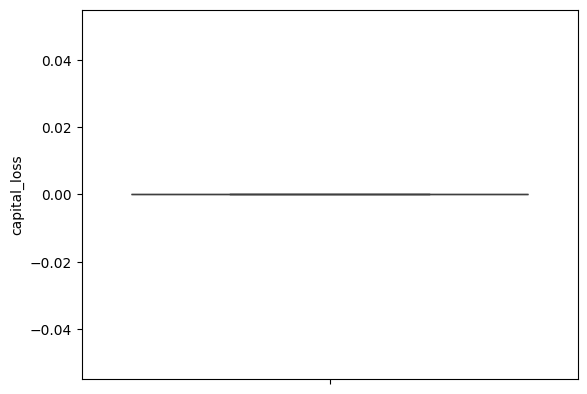

In [122]:
sns.boxplot(df['capital_loss'])

# Feature Engineering

In [126]:
from sklearn.preprocessing import LabelEncoder

In [127]:
le = LabelEncoder()

In [128]:
df.sex = le.fit_transform(df.sex)

In [132]:
df.race = le.fit_transform(df.race)

In [137]:
df.relationship = le.fit_transform(df.relationship)

In [138]:
df.occupation = le.fit_transform(df.occupation)

In [139]:
df.marital_status = le.fit_transform(df.marital_status)

In [140]:
df.education = le.fit_transform(df.education)

In [141]:
df.workclass = le.fit_transform(df.workclass)

In [142]:
df.native_country = le.fit_transform(df.native_country)

In [144]:
df.salary = le.fit_transform(df.salary)

In [145]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,7,77516,9,13.0,4,1,1,4,1,7.684324,0.0,40.0,39,0
1,50,6,83311,9,13.0,2,4,0,4,1,0.000000,0.0,32.5,39,0
2,38,4,215646,11,9.0,0,6,1,4,1,0.000000,0.0,40.0,39,0
3,53,4,234721,1,7.0,2,6,0,2,1,0.000000,0.0,40.0,39,0
4,28,4,338409,9,13.0,2,10,5,2,0,0.000000,0.0,40.0,5,0


<Axes: >

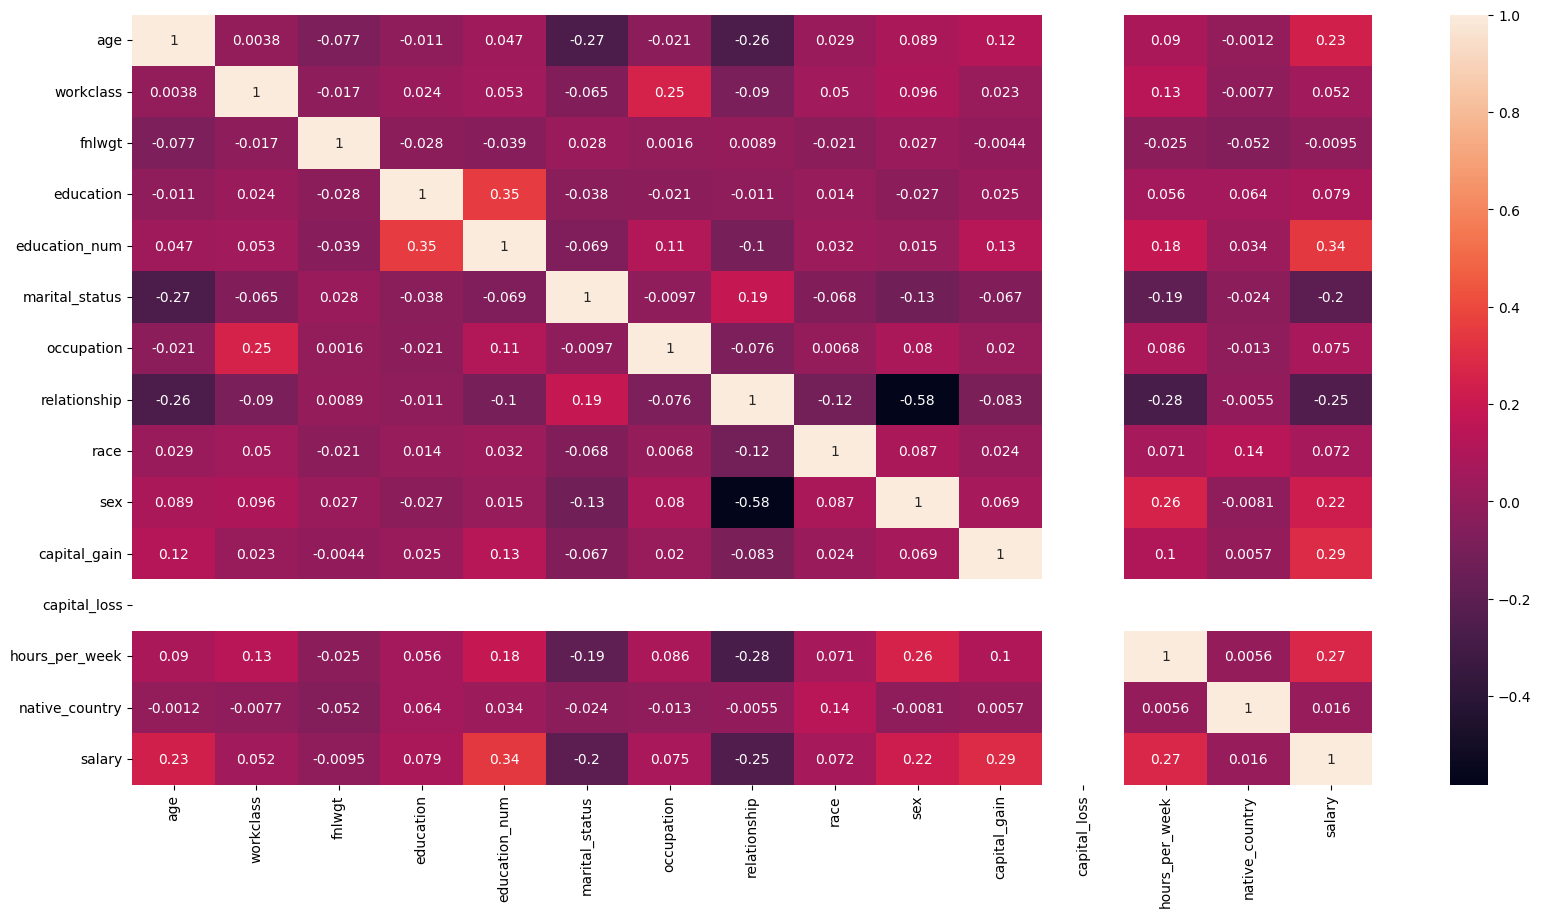

In [147]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)

In [149]:
df.drop('fnlwgt', axis=1, inplace=True)

In [151]:
df.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [155]:
sc = StandardScaler()

In [156]:
X = df[['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
          'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']]

In [157]:
y = df['salary']

In [163]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

In [158]:
y.value_counts()

salary
0    24720
1     7841
Name: count, dtype: int64

In [159]:
X = sc.fit_transform(X)

In [160]:
X

array([[ 0.03067056,  2.15057856, -0.33543693, ...,  0.        ,
        -0.194354  ,  0.29156857],
       [ 0.83710898,  1.46373585, -0.33543693, ...,  0.        ,
        -1.40659071,  0.29156857],
       [-0.04264203,  0.09005041,  0.18133163, ...,  0.        ,
        -0.194354  ,  0.29156857],
       ...,
       [ 1.42360965,  0.09005041,  0.18133163, ...,  0.        ,
        -0.194354  ,  0.29156857],
       [-1.21564337,  0.09005041,  0.18133163, ...,  0.        ,
        -1.40659071,  0.29156857],
       [ 0.98373415,  0.77689313,  0.18133163, ...,  0.        ,
        -0.194354  ,  0.29156857]])

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 13), (6513, 13), (26048,), (6513,))

In [164]:
from sklearn.linear_model import LogisticRegression

In [165]:
lg_model = LogisticRegression()

In [166]:
lg_model.fit(X_train, y_train)

LogisticRegression()

In [167]:
y_pred = lg_model.predict(X_test)

In [175]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

In [171]:
accuracy_score(y_test, y_pred)

0.8229694457239367

In [174]:
cm = confusion_matrix(y_test, y_pred)

In [176]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg_model.classes_)

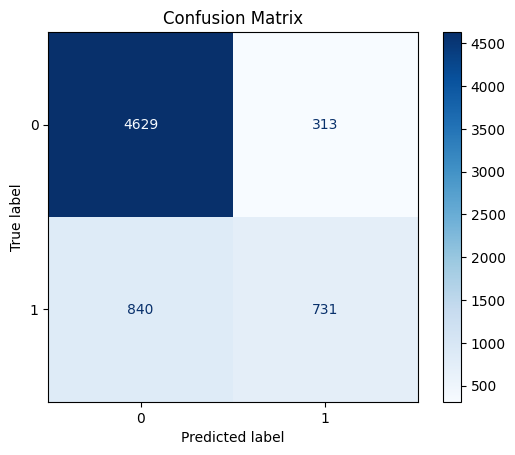

In [177]:
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [181]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4942
           1       0.70      0.47      0.56      1571

    accuracy                           0.82      6513
   macro avg       0.77      0.70      0.72      6513
weighted avg       0.81      0.82      0.81      6513

